In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
NSR = pd.read_csv("/content/drive/MyDrive/Tp12Simu/ModeloComputacional/FDPs/msha_accident.csv", sep = ";", encoding = "latin1")

/tmp/ipython-input-4190146376.py:1: DtypeWarning: Columns (1,3,4,5,6,7,8,12,13,14,15,16,17,23,25,26,27,28,29,30,31,32,33,35,36,37,39,40,41,42,43,44,45,46,50,51,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  NSR = pd.read_csv("/content/drive/MyDrive/Tp12Simu/ModeloComputacional/FDPs/msha_accident.csv", sep = ";", encoding = "latin1")


In [ ]:
type(NSR)

pandas.core.frame.DataFrame

In [ ]:
NSR.shape

(1048575, 59)

In [ ]:
NSR.head(10)

,mine_id,cntctr_id,subunit_cd,subunit_desc,ai_dt,inj_degr_desc,ai_class_desc,ai_occ_desc,ai_acty_desc,exper_tot_calc,...,days_lost,trans_term,return_to_work_dt,immed_notify_cd,immed_notify,invest_begin_dt,closed_doc_no,coal_metal_ind,load_dt,ai_year
0,4407259.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",17/11/2025,DAYS AWAY FROM WORK ONLY,OTHER,"Dry screening plant operator, Screen house ope...","Surface equipment, NEC",3.0,...,4.0,N,24/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",M,2025-11-29 00:35:59 EST,2025.0
1,1200063.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",11/11/2025,DAYS RESTRICTED ACTIVITY ONLY,POWERED HAULAGE,"Ledgeman/hand, Quarry man","Utility truck, Water trucks",3.0,...,0.0,N,18/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",M,2025-11-29 00:35:58 EST,2025.0
2,2003454.0,NaN,1.0,UNDERGROUND,11/11/2025,DAYS AWAY FROM WORK ONLY,SLIP OR FALL OF PERSON,"Miner, NEC",Inspect equipment or mine,0.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:03 EST,2025.0
3,101401.0,NaN,1.0,UNDERGROUND,10/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Laborer, Bull gang, Faceman, Parts runner, Rou...",Handling supplies or material,1.0,...,5.0,N,16/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",C,2025-11-29 00:36:03 EST,2025.0
4,4200079.0,NaN,2.0,SURFACE AT UNDERGROUND,10/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Belt foreman, Maintenance foreman, Maintenance...",Handling supplies or material,25.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,C,2025-11-29 00:36:14 EST,2025.0
5,4609111.0,NaN,1.0,UNDERGROUND,8/11/2025,FATALITY,INUNDATION,"Bull gang foreman, Labor foreman, Leadman, Sec...",Supervise,19.0,...,NaN,NaN,NaN,4,INNUMDATION,8/11/2025,NaN,C,2025-11-29 00:36:09 EST,2025.0
6,3102191.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",6/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Dry screening plant operator, Screen house ope...",Machine maintenance,0.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:13 EST,2025.0
7,4609028.0,NaN,1.0,UNDERGROUND,6/11/2025,FATALITY,POWERED HAULAGE,"Scoop tram operator, Load/Haul/Dump operator",Load-haul-dump (UG),4.0,...,0.0,N,NaN,1,DEATH,6/11/2025,NaN,C,2025-11-29 00:36:02 EST,2025.0
8,502666.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",31/10/2025,DAYS AWAY FROM WORK ONLY,HANDTOOLS (NONPOWERED),"Ledgeman/hand, Quarry man",Hand tools (not powered),2.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:13 EST,2025.0
9,4100298.0,NaN,30.0,MILL OPERATION/PREPARATION PLANT,31/10/2025,DAYS AWAY FROM WORK ONLY,SLIP OR FALL OF PERSON,"Electrician, Lineman","Walking, Running",26.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:14 EST,2025.0


In [ ]:
NSR.dtypes

,0
mine_id,float64
cntctr_id,object
subunit_cd,float64
subunit_desc,object
ai_dt,object
inj_degr_desc,object
ai_class_desc,object
ai_occ_desc,object
ai_acty_desc,object
exper_tot_calc,float64


In [ ]:
NSR['ai_dt'] = pd.to_datetime(NSR['ai_dt'], dayfirst=True)
NSR['anio'] = NSR['ai_dt'].dt.isocalendar().year
NSR['degree_injury_cd'] = pd.to_numeric(NSR['degree_injury_cd'], errors='coerce')
NSR['nivel'] = if(NSR['degree_injury_cd'] == 0)
severidad = NSR[(NSR.anio >= 2015)][['degree_injury_cd']].dropna(subset='degree_injury_cd')
severidad

,degree_injury_cd
0,3.0
1,5.0
2,3.0
3,3.0
4,3.0
...,...
69410,6.0
69411,4.0
69412,7.0
69413,0.0


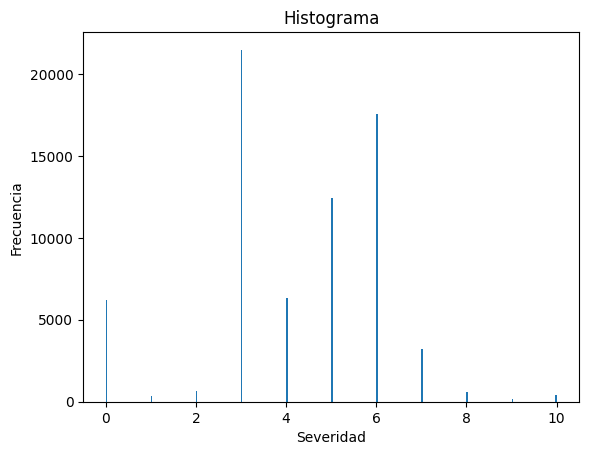

In [ ]:
plt.title("Histograma")
plt.xlabel("Severidad")
plt.ylabel("Frecuencia")
plt.hist(severidad, bins=300)
plt.show()

In [ ]:
pip install fitter

In [ ]:
from fitter import Fitter

In [ ]:
f = Fitter(severidad)

In [ ]:
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,19.261898,582.133962,609.577537,inf,0.160292,0.0
dweibull,19.329969,569.583985,597.027559,inf,0.161743,0.0
skewcauchy,19.422001,693.165589,720.609163,inf,0.196636,0.0
gumbel_l,19.535056,660.828183,679.123899,inf,0.161731,0.0
exponweib,19.557172,598.187635,634.779068,inf,0.159693,0.0
skewnorm,19.557692,603.496755,630.940330,inf,0.162906,0.0
weibull_min,19.558103,595.207298,622.650872,inf,0.154982,0.0
loggamma,19.560642,594.466994,621.910569,inf,0.160142,0.0
johnsonsb,19.561020,593.494929,630.086362,inf,0.158674,0.0
powernorm,19.561208,596.390813,623.834388,inf,0.162495,0.0


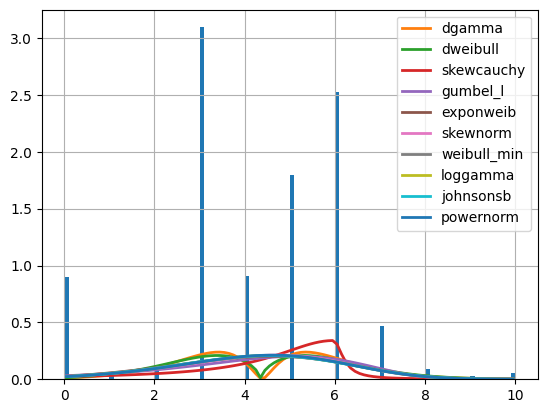

In [ ]:
f.summary(10)

In [ ]:
f.get_best(method='sumsquare_error')

{'dgamma': {'a': 2.50208624966522,
  'loc': 4.390091400881478,
  'scale': 0.6444600118419814}}